In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.19.0


In [4]:
# import some basic librraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
y = dataset['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
X = dataset.drop(columns=['RowNumber','CustomerId', 'Surname', 'Exited'])


In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
geofraphy = pd.get_dummies(X['Geography'], drop_first=True,dtype='int64')
gender = pd.get_dummies(X['Gender'], drop_first=True,dtype='int64')

In [10]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [11]:
X = pd.concat([X, geofraphy, gender], axis = 1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
# feature scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [16]:
X_train.shape

(8000, 11)

In [17]:
X_test.shape

(2000, 11)

In [18]:
# create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
# initial ANN
classifier = Sequential()

In [20]:
# adding input layer
classifier.add(Dense(units=11, activation='relu'))

# to add dropout in the LazyLoader
#  classifier.add(dropout(0.3))

In [21]:
# adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [22]:
# adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [23]:
#  adding output LazyLoader

classifier.add(Dense(1,activation='sigmoid'))

In [24]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
from scipy import optimize


classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
#  early stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
    
)

In [27]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7737 - loss: 0.4979 - val_accuracy: 0.7955 - val_loss: 0.4043
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.3937 - val_accuracy: 0.8417 - val_loss: 0.3954
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8463 - loss: 0.3788 - val_accuracy: 0.8523 - val_loss: 0.3701
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8468 - loss: 0.3641 - val_accuracy: 0.8516 - val_loss: 0.3618
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3426 - val_accuracy: 0.8535 - val_loss: 0.3651
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8618 - loss: 0.3369 - val_accuracy: 0.8497 - val_loss: 0.3607
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3260 - val_accuracy: 0.8497 - val_loss: 0.3608
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3421 - 

In [28]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

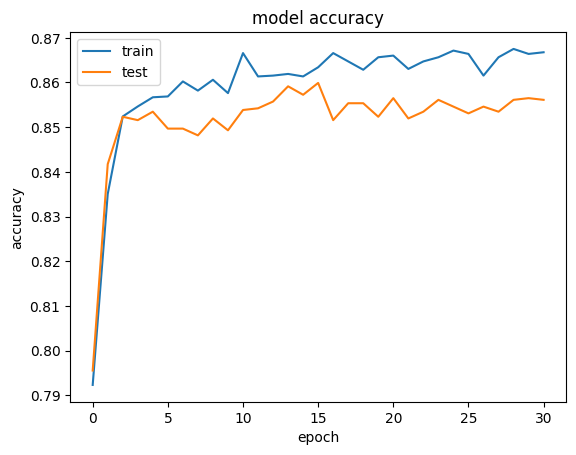

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

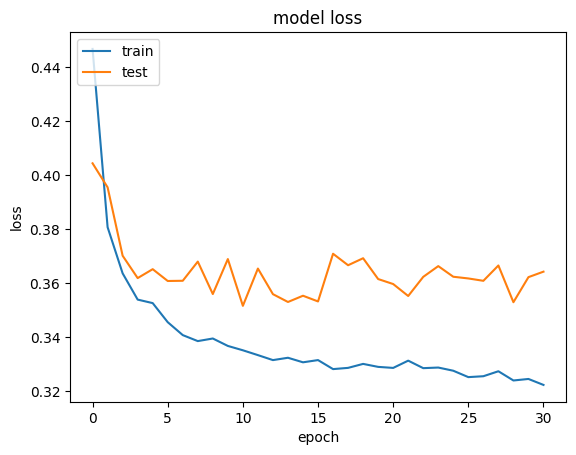

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1473,  122],
       [ 186,  219]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.846

In [34]:
# get the weights

classifier.get_weights()

[array([[-0.64717835,  0.19670892, -0.17711689,  0.00554308,  0.5737775 ,
         -0.30782902,  0.00824756, -0.38801253, -0.13057612,  0.00305089,
         -0.546066  ],
        [ 2.983551  ,  0.10197568, -2.3962202 ,  1.3247409 , -0.02327698,
         -0.63148826,  2.8014572 ,  1.1307031 , -0.9267795 ,  0.02122023,
          0.6976997 ],
        [-1.1677989 , -0.46254444, -0.6220699 , -0.3996    ,  0.37434933,
          0.06922412,  0.01341152, -0.3031266 , -0.6448121 ,  0.6085233 ,
          0.1343072 ],
        [-0.1286093 , -0.5786526 , -0.3694157 ,  1.8516877 , -2.0361173 ,
          0.19401726, -0.3049497 ,  0.24512623, -0.41661963, -1.407967  ,
         -2.2078016 ],
        [-1.4191159 , -0.16178156,  1.1935266 ,  1.3166599 ,  2.0356624 ,
          2.0328298 ,  0.6044939 ,  2.5976007 , -1.7241298 , -0.34421545,
         -2.8115778 ],
        [-0.40078947,  1.3563143 , -0.02720387, -0.4770394 ,  0.03399672,
          1.3740194 , -0.11121693,  0.00434983,  0.9440294 , -0.5270443

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_lr_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

Accuracy: 0.811
Confusion Matrix:
 [[1526   69]
 [ 309   96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

